In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam

np.set_printoptions(suppress=True)
%matplotlib inline

In [85]:
df = pd.read_csv('loan_data.csv')

In [86]:
df.head()

,Interest.Rate,FICO.Score,Loan.Length,Monthly.Income,Loan.Amount
6,15.31,670.0,36,4891.67,6000
11,19.72,670.0,36,3575.00,2000
12,14.27,665.0,36,4250.00,10625
13,21.67,670.0,60,14166.67,28000
21,21.98,665.0,36,6666.67,22000


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 6 to 2497
Data columns (total 5 columns):
Interest.Rate     2497 non-null float64
FICO.Score        2499 non-null float64
Loan.Length       2500 non-null int64
Monthly.Income    2495 non-null float64
Loan.Amount       2500 non-null int64
dtypes: float64(3), int64(2)
memory usage: 117.2 KB


In [88]:
df['Target']=df['Interest.Rate']<9


In [89]:
df['FICO.Score'].isnull().value_counts()

False    2499
True        1
Name: FICO.Score, dtype: int64

In [90]:
df['Loan.Length'].isnull().value_counts()

False    2500
Name: Loan.Length, dtype: int64

In [91]:
df['Monthly.Income'].isnull().value_counts()

False    2495
True        5
Name: Monthly.Income, dtype: int64

In [92]:
df['Loan.Amount'].isnull().value_counts()

False    2500
Name: Loan.Amount, dtype: int64

In [93]:
#fill NA
df.fillna(df['FICO.Score'].mean(), inplace=True)
df.fillna(df['Monthly.Income'].mean(), inplace=True)


In [94]:
y = df.pop('Target').values
df.pop('Interest.Rate')
x = df.values

In [95]:
x[:5]

array([[  670.  ,    36.  ,  4891.67,  6000.  ],
       [  670.  ,    36.  ,  3575.  ,  2000.  ],
       [  665.  ,    36.  ,  4250.  , 10625.  ],
       [  670.  ,    60.  , 14166.67, 28000.  ],
       [  665.  ,    36.  ,  6666.67, 22000.  ]])

In [68]:
#scale data 
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)

In [69]:
x_scaled[:5]

array([[-1.02442697, -0.52984687, -0.19883533, -0.8213478 ],
       [-1.02442697, -0.52984687, -0.53080794, -1.33416933],
       [-1.16722277, -0.52984687, -0.36061988, -0.22839789],
       [-1.02442697,  1.88733775,  2.13967469,  1.99917066],
       [-1.16722277, -0.52984687,  0.24869624,  1.22993836]])

In [70]:
#set up the optimizer
opt = Adam(learning_rate=0.001)
opt.get_config()

{'name': 'Adam',
 'learning_rate': 0.001,
 'decay': 0.0,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07,
 'amsgrad': False}

In [104]:
#create the model with 3 layers
model = Sequential()
model.add(Dense(units=8, activation='relu', input_shape=(4,), name='L1'))
model.add(Dense(units=4, activation='relu', name='L2'))
model.add(Dense(units=1, activation='sigmoid', name='L3'))
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy','Precision','Recall','AUC'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
L1 (Dense)                   (None, 8)                 40        
_________________________________________________________________
L2 (Dense)                   (None, 4)                 36        
_________________________________________________________________
L3 (Dense)                   (None, 1)                 5         
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [105]:
#fit the model
history = model.fit(x_scaled, y, epochs=30, batch_size=25, verbose=1, validation_split=0.3, shuffle=True)

Train on 1750 samples, validate on 750 samples
Epoch 1/30
1750/1750 [==============================] - 1s 473us/sample - loss: 0.4820 - accuracy: 0.8503 - Precision: 0.1070 - Recall: 0.1739 - AUC: 0.5698 - val_loss: 0.7992 - val_accuracy: 0.4387 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_AUC: 0.6028
Epoch 2/30
1750/1750 [==============================] - 0s 65us/sample - loss: 0.2070 - accuracy: 0.9343 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - AUC: 0.8412 - val_loss: 0.7785 - val_accuracy: 0.4387 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_AUC: 0.8280
Epoch 3/30
1750/1750 [==============================] - 0s 66us/sample - loss: 0.1572 - accuracy: 0.9343 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - AUC: 0.9347 - val_loss: 0.6258 - val_accuracy: 0.6320 - val_Precision: 0.9096 - val_Recall: 0.3824 - val_AUC: 0.8654
Epoch 4/30
1750/1750 [==============================] - 0s 64us/sample - loss: 0.1412 - accuracy: 0.9377 - Precision: 0.6875 - Recall: 0.

No handles with labels found to put in legend.


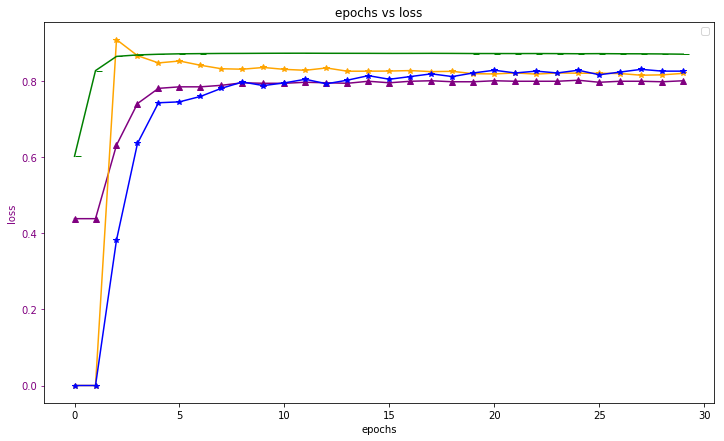

In [114]:
#Plot the output
fig, ax1 = plt.subplots(1,1,figsize=(12,7))

ax1.plot(history.epoch, history.history['val_accuracy'], marker='^', color='purple')
ax1.plot(history.epoch, history.history['val_Precision'], marker='*', color='orange')
ax1.plot(history.epoch, history.history['val_AUC'], marker=True, color='green')
ax1.plot(history.epoch, history.history['val_Recall'], marker='*', color='blue')

ax1.set_xlabel('epochs')
ax1.set_ylabel('loss', color='purple')
ax1.tick_params('y', colors='purple')
plt.title('epochs vs loss')
plt.legend();